In [1]:
import matplotlib.pyplot as plt
import numpy as np
from classes import Mapping 
from copy import copy
import pickle
import functions as ft

import matplotlibcolors
plt.style.use('matplotlibrc')

%matplotlib widget

In [2]:
f0_a = ft.rel_freqs(4.15, 5.85, 612)
f0_b = ft.rel_freqs(6.15, 7.85, 612)
chi = 3
sigma = 2e-4
Q = 30e3
print((ft.yld(Q, chi, sigma, Delta=None, fs=f0_a)+ft.yld(Q, chi, sigma, Delta=None, fs=f0_b))/2)


0.9299253012384818


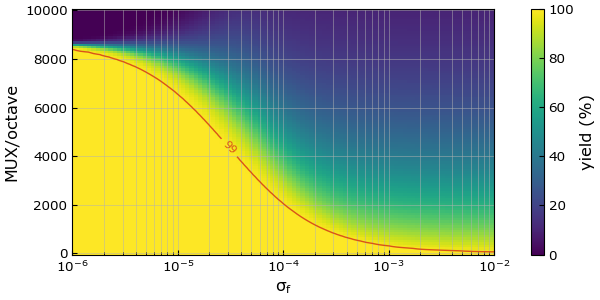

In [3]:
oct = 1
Q = 50e3
chi = 4
yld = .99

nr = 100
Ns = np.linspace(1, 10000, nr)
sigmas = np.logspace(-6, -2, nr)
map = ft.yld_map(Ns, sigmas, Q, chi, oct)
lim1 = oct/np.log2(chi/Q+1)
lim2 = chi/Q/np.sqrt(1+2**(oct/Ns))
lim3 = (2**(oct/Ns)-1)/np.sqrt(1+2**(oct/Ns))
lim4 = oct/np.log2(chi/Q+1)
fig, axes = plt.subplot_mosaic('a', figsize=(6, 3), constrained_layout=True, sharey=True)
ax = axes['a']
# ax.axhline(lim4, c='k', ls='--', label='$2oct/(\mathrm{log}_2(\lambda/Q+1))$')
# ax.plot(lim2, Ns, c='k', ls='--', label='$\lambda/Q$')
# ax.plot(lim3, Ns, c='k', ls='--', label='$2^(oct/N)-1$')
# ax.imshow(map)
c = ax.pcolormesh(sigmas, Ns, map*100, shading='auto', cmap='viridis')
c.set_clim(0, 100)
ax.set_yscale('linear')
ax.set_xscale('log')
ax.set_ylabel('MUX/octave')
ax.set_xlabel('$\sigma_f$')
# ax.set_ylim(0, 6000)
ax.set_xlim(1e-6, 1e-2)
# ax.set_yscale('log')
CS = ax.contour(sigmas, Ns, map*100, levels=[yld*100], colors='o')
ax.clabel(CS, inline=True, fontsize=8)
fig.colorbar(c, ax=ax, label='yield (%)', orientation='vertical', location='right')
# ax = axes['b']	)
oct = 1
Q = 30e3

# nr = 100
# chis = [2]
# # Ns = np.linspace(1, 10000, nr)
# # sigmas = np.logspace(-6, -2, nr)

# for chi in chis:
#     map = ft.yld_map(Ns, sigmas, Q, chi, oct)
#     CS = ax.contour(sigmas, Ns, map, levels=[0.95], colors='o', linestyles='--')
# ax.set_xscale('log')

In [4]:
## Load chips and initiate objects
dir = 'chips/'
LT295chip3 = Mapping(dir + 'LT295chip3_master.pkl', Q=Q, min_lw_spacing=chi)
LT343chip5 = Mapping(dir + 'LT343chip5_master.pkl')
LT343chip9 = Mapping(dir + 'LT343chip9_master.pkl')
LT361chip4 = Mapping(dir + 'LT361chip4_master.pkl', mask_edges=True)
LT361chip4_trim = Mapping(dir + 'LT361chip4_master.pkl', mask_edges=True, type='trim')
LT361chip5 = Mapping(dir + 'LT361chip4_master.pkl')
LT361chip7 = Mapping(dir + 'LT361chip7_master.pkl')
LT361chip8 = Mapping(dir + 'LT361chip4_master.pkl')
LT402chip1 = Mapping(dir + 'LT402chip1_master.pkl', mask_edges=True, Q=Q, min_lw_spacing=chi)
LT402chip1_trim = Mapping(dir + 'LT402chip1_master.pkl', type='trim', Q=Q, min_lw_spacing=chi)
LT402chip1_lens = Mapping(dir + 'LT402chip1_master.pkl', type='lens', Q=Q, min_lw_spacing=chi)
LT402chip4 = Mapping(dir + 'LT402chip4_master.pkl', mask_edges=True, Q=Q, min_lw_spacing=chi)
LT402chip4_trim = Mapping(dir + 'LT402chip4_master.pkl', type='trim', Q=Q, min_lw_spacing=chi)
LT402chip4_lens = Mapping(dir + 'LT402chip4_master.pkl', type='lens', Q=Q, min_lw_spacing=chi)
LT402chip5 = Mapping(dir + 'LT402chip5_master.pkl', mask_edges=True)
LT402chip6 = Mapping(dir + 'LT402chip6_master.pkl', mask_edges=True, Q=Q, min_lw_spacing=chi)
LT402chip6_trim = Mapping(dir + 'LT402chip6_master.pkl', type='trim', Q=Q, min_lw_spacing=chi)


0.011722379072116953
0.005642839932923185
0.00035542446044236947
0.00023802702811360078
0.0001108013064010959


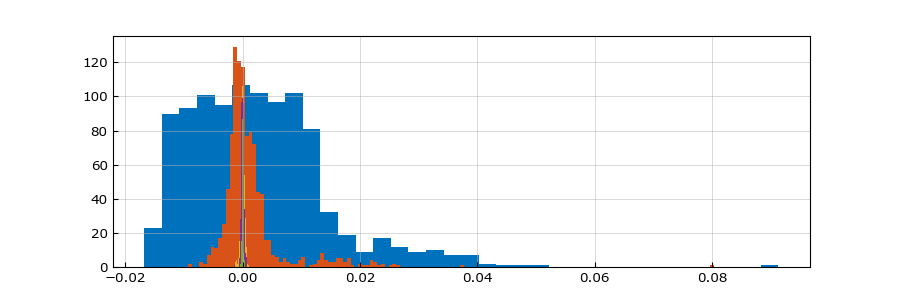

In [6]:
chips = [LT402chip4, LT402chip4_trim, LT402chip4_lens]

fig, ax = plt.subplots(figsize=(9,3))
for i, chip in enumerate(chips):
    df_f = chip.df_f_fit
    ax.hist(df_f, bins='auto')
    print(np.nanstd(df_f))
    if i==0 or i==2:
        chip.remove_spatial()
        df_f = chip.df_f_spatial
        ax.hist(df_f, bins='auto')
        print(np.nanstd(df_f))

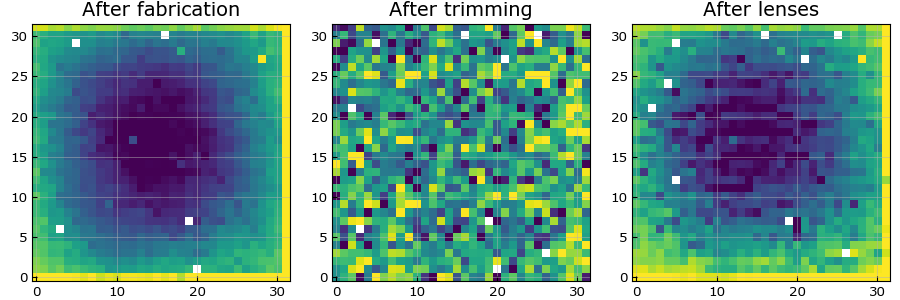

In [17]:
chips = [LT402chip4, LT402chip4_trim, LT402chip4_lens]
titles = ['After fabrication', 'After trimming', 'After lenses']
fig, ax = plt.subplots(1, 3, figsize=(9,3), constrained_layout=True)
for i, chip in enumerate(chips):
    ax[i].imshow(chip.df_f_fit[chip.map], origin='lower', cmap='viridis', vmin=np.nanpercentile(chip.df_f_fit, 5), vmax=np.nanpercentile(chip.df_f_fit, 95))
    ax[i].set_title(titles[i])

In [ ]:
fig, ax =  plt.subplots(figsize=(6, 4), constrained_layout=True)
ax.scatter(LT402chip6_trim.Lf - LT402chip6.Lf, np.abs(LT402chip6_trim.df_f_fit))
# ax.plot(LT402chip6_trim.Lf)

In [ ]:
chip = LT402chip4
chip2 = Mapping(dir + 'LT402chip4_master.pkl', mask_edges=False, Q=Q, min_lw_spacing=chi)
chip2.nan_edges()
chip2.remove_spatial()

fig, axes = plt.subplot_mosaic('eb', figsize=(9, 4), constrained_layout=True)
ylim = [0, 120]
xlim = [-0.01, 0.01]
# ax = axes['d']
# ax.set_title('raw', fontsize=12)
# ax.hist(chip.df_f, bins='auto', facecolor='b')
# print(np.nanstd(chip.df_f))
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)
# ax.set_xlabel('df/f')
# ax.set_ylabel('Counts')
ax = axes['e']
# ax.set_title('frequency corr.', fontsize=12)
# ax.hist(chip.df_f_fit, bins=40, facecolor='b')
# print(np.nanstd(chip.df_f_fit))
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)
# ax.set_xlabel('df/f')
# ax = axes['f']
ax.set_title('spatial & frequency corr.', fontsize=12)
ax.hist(chip2.df_f_spatial, bins='auto', facecolor='b')
print(np.nanstd(chip2.df_f_spatial))
ax.set_xticks(np.linspace(xlim[0], xlim[1], 5, endpoint=True))
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel('df/f')
# ax = axes['a']
# clim = [-0.1, 0.1]
# img = ax.imshow(chip.df_f[chip.map], cmap='viridis', origin='lower', clim=clim)
# cbar = fig.colorbar(img, ax=ax, orientation='horizontal', pad=0.1)
# cbar.set_label('df/f')
# ax.set_xticklabels([])
# ax.set_yticklabels([])
ax = axes['b']
# clim = [-0.02, 0.02]
# img = ax.imshow(chip.df_f_fit[chip.map], cmap='viridis', origin='lower', clim=xlim)
# cbar = fig.colorbar(img, ax=ax, orientation='vertical')
# cbar.set_label('df/f')
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax = axes['c']
clim = [-0.01, 0.01]
img = ax.imshow(chip2.df_f_spatial[chip2.map], cmap='viridis', origin='lower', clim=clim)
cbar = fig.colorbar(img, ax=ax, orientation='vertical')
ax.grid()
cbar.set_label('df/f')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.savefig('32x32map+hist_corr.svg')

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3), constrained_layout=True)
x = np.arange(1024)
ax.scatter(x, np.sort(LT402chip6.fm), facecolor='None', edgecolor='b', label='measured')
ax.scatter(x, np.sort(LT402chip6_trim.fd), facecolor='None', edgecolor='o', label='design trim')
ax.set_ylabel('Frequency (GHz)')
ax.set_xlabel('#')
ax.legend()

In [ ]:
fig, axes = plt.subplot_mosaic('ab', figsize=(9, 4), constrained_layout=True)
xlim = [-0.01, 0.01]	
cticks = [-0.01, -0.005, 0, 0.005, 0.01]
ax = axes['a']
ax.hist(chip2.df_f_spatial, bins='auto', facecolor='b', label='before trimming')
_ = ax.hist(LT402chip6_trim.df_f_fit, bins='auto', label='after trimming')
ax.legend()
print(np.nanstd(LT402chip6_trim.df_f_fit))
ax.set_xlim(xlim)
ax.set_xticks(cticks)
ax.set_xticklabels(cticks)
ax.set_ylim(0, 120)
ax.set_xlabel('df/f')
ax.set_ylabel('Counts') 
ax = axes['b']
cbar = fig.colorbar(img, ax=ax)
img = ax.imshow(LT402chip6_trim.df_f_fit[LT402chip6_trim.map], origin='lower', cmap='viridis', clim=xlim)
# cbar.set_ticks(cticks)
# cbar.set_ticklabels(cticks)
cbar.set_label('df/f')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.savefig('scatter_trimming.svg')

In [ ]:
chip = LT361chip7
fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)  
ax.hist(chip.df_f_fit, bins='auto')
ax.set_xlabel('df/f')
ax.set_ylabel('Counts')
ax.set_xlim(-0.004, 0.004)
ax.set_ylim(0, 30)
print(np.nanstd(chip.df_f_fit))

In [7]:
file = dir + 'LT361chip4_master.pkl'
with open(file, 'rb') as f:
    arr = pickle.load(f)
trims = arr['trimdesign']['fingers'] - arr['design']['fingers']
control_ids = trims == 0
trimmed_ids = trims < -0.08

In [ ]:
file = dir + 'LT361chip4_master.pkl'
with open(file, 'rb') as f:
    arr = pickle.load(f)
arr['lensdesign']

In [ ]:
chips = [LT295chip3, LT361chip4, LT402chip6_trim]
labels = ['Optical', 'E-beam', 'E-beam+trimming', 'Trimming process']
fig, axes = plt.subplot_mosaic('a', figsize=(18.5/2/2.54, 8/2.54), constrained_layout=True)
ax = axes['a']
for chip in chips:
    ax.hist(chip.df_f_fit, alpha=0.75, bins='auto')
LT361chip4_trim = Mapping(dir + 'LT361chip4_master.pkl', mask_edges=True, trim=True)
LT361chip4_trim.remap(~control_ids)
ax.hist(LT361chip4_trim.df_f_fit, bins=1, alpha=0.75)
ax.legend(labels, ncols=2, loc='best')
ax.set_xlabel('df/f')
ax.set_ylabel('Counts')
# ax.set_xscale('log')
# ax.set_xlim(left=-8, right=8)  # Set limits for both positive and negative sides


In [ ]:
chips = [LT402chip6_trim]
labels = ['E-beam, trimming', 'E-beam, trimming process']
fig, axes = plt.subplot_mosaic('a', figsize=(18.5/2/2.54, 8/2.54), constrained_layout=True)
ax = axes['a']
for chip in chips:
    ax.hist(chip.df_f_fit, alpha=0.75, bins=40)
LT361chip4_trim = Mapping(dir + 'LT361chip4_master.pkl', mask_edges=True, trim=True)
LT361chip4_trim.remap(~control_ids)
ax.hist(LT361chip4_trim.df_f_fit, bins=3, alpha=0.75)
ax.legend(labels, ncols=1)
ax.set_xlabel('df/f')
ax.set_ylabel('Counts')
# ax.set_xscale('log')
# ax.set_xlim(left=-8, right=8)  # Set limits for both positive and negative sides

In [ ]:
fig, axs = plt.subplot_mosaic('a', figsize=(18.5/2/2.54, 8/2.54), constrained_layout=True)
ax = axs['a']
LT361chip4_trim = Mapping(dir + 'LT361chip4_master.pkl', mask_edges=True, trim=True)
LT361chip4_trim.remap(~trimmed_ids)
ax.hist(LT361chip4_trim.df_f_fit*1e4, bins=24, alpha=0.75, label='Trimmed')
LT361chip4_trim = Mapping(dir + 'LT361chip4_master.pkl', mask_edges=True, trim=True)
LT361chip4_trim.remap(~control_ids)
ax.hist(LT361chip4_trim.df_f_fit*1e4, bins=6, alpha=0.75, label='Not trimmed')
ax.set_xlim(-8, 8)
ax.set_xlabel('df/f ($\\times$10$^{4}$)')
ax.set_ylabel('Counts')
ax.legend()

In [ ]:
chips = [LT402chip4, LT402chip1, LT361chip7]
labels = ['E-beam 32x32 150um pp', 'E-beam 20x20 150um pp', 'E-beam 11x11 450um pp']
fig, axes = plt.subplot_mosaic('ad;cb', figsize=(18.5/3*2/2.54, 12/2.54), constrained_layout=True)
spatial = [1, 1, 0]
ax = axes['b']
for i, chip in enumerate(chips):
    if spatial[i]:
        chip.remove_spatial()
        ax.hist(chip.df_f_spatial, alpha=0.75, bins='auto')
        print(np.nanstd(chip.df_f_spatial[chip.edge_mask]))
    else:
        ax.hist(chip.df_f_fit, alpha=0.75, bins='auto')
        print(np.nanstd(chip.df_f_fit))
ax.legend(labels)
ax.set_xlabel('df/f')
ax.set_ylabel('Counts')
ax.set_xlim(-0.025, 0.025)
ax = axes['a']
ax.imshow(chips[0].df_f_spatial[chips[0].map], cmap='viridis', origin='lower', clim=[-0.02, 0.02])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title(labels[0], fontsize=12)
ax = axes['c']
empty_array = np.full((32, 32), np.nan)  # Create a 32x32 array filled with NaNs
center_x, center_y = (empty_array.shape[0] // 2, empty_array.shape[1] // 2)
half_size = chips[1].df_f_spatial[chips[1].map].shape[0] // 2

# Place df_f_spatial[chips[1].map] in the center
empty_array[center_x - half_size:center_x + half_size, center_y - half_size:center_y + half_size] = chips[1].df_f_spatial[chips[1].map]
ax.imshow(empty_array, cmap='viridis', origin='lower', clim=[-0.02, 0.02])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title(labels[1], fontsize=12)
ax = axes['d']
ax.imshow(chips[2].df_f_fit[chips[2].map], cmap='viridis', origin='lower', clim=[-0.02, 0.02])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title(labels[2], fontsize=12)
